In [2]:
!wget https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip

--2022-05-22 03:35:52--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘FullIJCNN2013.zip’

FullIJCNN2013.zip   100%[===================>]   1.55G  13.5MB/s    in 1m 59s  

2022-05-22 03:37:53 (13.3 MB/s) - ‘FullIJCNN2013.zip’ saved [1661866983/1661866983]



In [ ]:
!unzip FullIJCNN2013.zip

In [5]:
!ls -al ./FullIJCNN2013/gt.txt

-rw-r--r-- 1 root root 35282 Jul  9  2013 ./FullIJCNN2013/gt.txt


In [6]:
import pandas as pd
import os
import cv2

In [8]:
test_percentage =  0.2
file_name = './FullIJCNN2013/gt.txt'

In [18]:
annotation = pd.read_csv(file_name, 
                         names=['ImageId', 'Roi.X1', 'Roi.Y1', 
                                'Roi.X2', 'Roi.Y2', 'ClassId'],
                         sep=';')

In [19]:
annotation.head()

,ImageId,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


In [20]:
Prohibitory = [0,1,2,3,4,5,6,7,8,10,15,16]
Danger = [11,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
Mandatory = [33,34,35,36,37,38,39,40]
Other = [6,12,13,14,17,32,41,42]

Categories = ['Prohibitory', 'Danger', 'Mandatory', 'Other']

In [21]:
annotation["CategoryId"] = 0
annotation.loc[annotation['ClassId'].isin(Prohibitory), "CategoryId"] = 0
annotation.loc[annotation['ClassId'].isin(Danger), "CategoryId"] = 1
annotation.loc[annotation['ClassId'].isin(Mandatory), "CategoryId"] = 2
annotation.loc[annotation['ClassId'].isin(Other), "CategoryId"] = 3

In [22]:
annotation.head()

,ImageId,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,CategoryId
0,00000.ppm,774,411,815,446,11,1
1,00001.ppm,983,388,1024,432,40,2
2,00001.ppm,386,494,442,552,38,2
3,00001.ppm,973,335,1031,390,13,3
4,00002.ppm,892,476,1006,592,39,2


In [23]:
annotation['centerX'] = (annotation['Roi.X2']+annotation['Roi.X1']) /2 
annotation['centerY'] = (annotation['Roi.Y2']+annotation['Roi.Y1']) /2 
annotation['width'] = (annotation['Roi.X2']-annotation['Roi.X1']) 
annotation['height'] = (annotation['Roi.Y2']-annotation['Roi.Y1']) 

In [24]:
annotation.head()

,ImageId,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,CategoryId,centerX,centerY,width,height
0,00000.ppm,774,411,815,446,11,1,794.5,428.5,41,35
1,00001.ppm,983,388,1024,432,40,2,1003.5,410.0,41,44
2,00001.ppm,386,494,442,552,38,2,414.0,523.0,56,58
3,00001.ppm,973,335,1031,390,13,3,1002.0,362.5,58,55
4,00002.ppm,892,476,1006,592,39,2,949.0,534.0,114,116


In [76]:
imapg_path = './FullIJCNN2013/'

In [77]:
os.chdir(imapg_path)

In [66]:
!ls -al 

total 3345148
drwxr-xr-x 46 root root     69632 May 22 04:27 .
drwxr-xr-x  1 root root      4096 May 22 04:31 ..
drwxr-xr-x  2 root root      4096 Jul  9  2013 00
-rw-r--r--  1 root root    361627 May 22 04:15 00000.jpg
-rw-r--r--  1 root root   3264016 Nov 26  2012 00000.ppm
-rw-r--r--  1 root root        59 May 22 04:15 00000.txt
-rw-r--r--  1 root root    520885 May 22 04:15 00001.jpg
-rw-r--r--  1 root root   3264016 Nov 26  2012 00001.ppm
-rw-r--r--  1 root root       169 May 22 04:15 00001.txt
-rw-r--r--  1 root root    400637 May 22 04:15 00002.jpg
-rw-r--r--  1 root root   3264016 Nov 26  2012 00002.ppm
-rw-r--r--  1 root root        53 May 22 04:15 00002.txt
-rw-r--r--  1 root root    623796 May 22 04:15 00003.jpg
-rw-r--r--  1 root root   3264016 Nov 26  2012 00003.ppm
-rw-r--r--  1 root root       177 May 22 04:15 00003.txt
-rw-r--r--  1 root root    578250 May 22 04:15 00004.jpg
-rw-r--r--  1 root root   3264016 Nov 26  2012 00004.ppm
-rw-r--r--  1 root root       113 May 2

In [78]:
paths = []
for current_dir, dirs, files in os.walk('.'):
  for file in files:
    if file.endswith('.ppm'):
      image_ppm = cv2.imread(file)
      h, w = image_ppm.shape[:2]
      image_name = file.split('.')[0]
      txt_file = image_name + '.txt'
      image_jpg = image_name + '.jpg'
      # cv2.imwrite(image_jpg, image_ppm)
      txt = open(txt_file, 'w')
      objects = annotation.loc[annotation['ImageId'] == file].copy()
      for index, data in objects.iterrows():
        line = str(data['CategoryId']) + ' ' + str(data['centerX']/w) + ' ' + str(data['centerY']/h) + ' ' + str(data['width']/w) + ' ' + str(data['height']/h) + '\n'
        txt.write(line)
      image_path = imapg_path + image_jpg + '\n'
      paths.append(image_path)
      # print(image_jpg, 'is created')

In [82]:
num_test = int(len(paths)*test_percentage)
print(len(paths))
print(num_test)

2113
422


In [83]:
paths_test = paths[:num_test]
paths_train = paths[num_test:]

In [84]:
os.chdir('/content')

In [86]:
with open('train.txt', 'w') as train_txt:
  for path in paths_train:
    train_txt.write(path)
  print('train.txt is created')

train.txt is created


In [87]:
with open('test.txt', 'w') as test_txt:
  for path in paths_test:
    test_txt.write(path)
  print('test_txt is created')

test_txt is created


In [89]:
with open( 'classes.names', 'w') as names:
    for category in Categories:
      line = category + '\n'
      names.write(line)
    print('[classes.names] is created')

[classes.names] is created


In [90]:
with open('traffic.data', 'w') as data:
    data.write('classes = ' + str(len(Categories)) + '\n')
    data.write('train = ' + 'train.txt' + '\n')
    data.write('valid = ' + 'test.txt' + '\n')
    data.write('names = ' + 'classes.names' + '\n')
    data.write('backup = backup')
    print('[custom_data.data] is created')

[custom_data.data] is created


In [91]:
!mkdir backup

mkdir: cannot create directory ‘backup’: File exists


In [92]:
# # trafiic-sign-yolo.cfg
# # darknet
# # darknet53.conv.74
# from google.colab import files
# files.upload()

from google.colab import drive
drive.mount('/gdrive')
!cp -r /gdrive/MyDrive/Darknet/Custom/darknet .
!cp -r /gdrive/MyDrive/Darknet/Custom/Traffic/traffic-train-yolo.cfg .
!cp -r /gdrive/MyDrive/Darknet/Custom/darknet53.conv.74 .

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [93]:
!chmod +x ./darknet

In [94]:
# Train Model
!./darknet detector train traffic.data traffic-train-yolo.cfg darknet53.conv.74 -dont_show

traffic-train-yolo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 

#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp -r /gdrive/MyDrive/Darknet/Custom/Traffic/ .

In [ ]:
!ls -al ./trafficsign

ls: cannot access './trafficsign': No such file or directory


In [ ]:
weight_file = './Traffic/traffic-train-yolo_final.weights'
cfg_file = './Traffic/traffic-train-yolo.cfg'
name_file = './Traffic/classes.names'

min_confidence = 0.5

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

['Prohibitory', 'Danger', 'Mandatory', 'Other']


In [ ]:
frame_count = 0
writer = None
input_name = './Traffic/traffic-sign-video.mp4'
output_name = 'traffic-sign-video.avi'
#file_name = './Traffic/00000.ppm' 
file_name = './Traffic/00000.png'



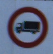

54 53


In [ ]:
# img = cv2.imread(file_name)
# height, width, channels = img.shape
# cv2_imshow(img)
# print(height, width)

# 훈련한 모델이 Recognition Model 이기 때문에 Detection 은 안된다!

0 Prohibitory


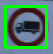

In [ ]:
img = cv2.imread(file_name)
height, width, channels = img.shape
# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(class_ids[i], label)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 10), font, 0.5, (0, 255, 0), 1)  

cv2_imshow(img)  